<a href="https://colab.research.google.com/github/jaiswi/EDA-projects/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name**    - **Mobile Price Range Prediction** 📱


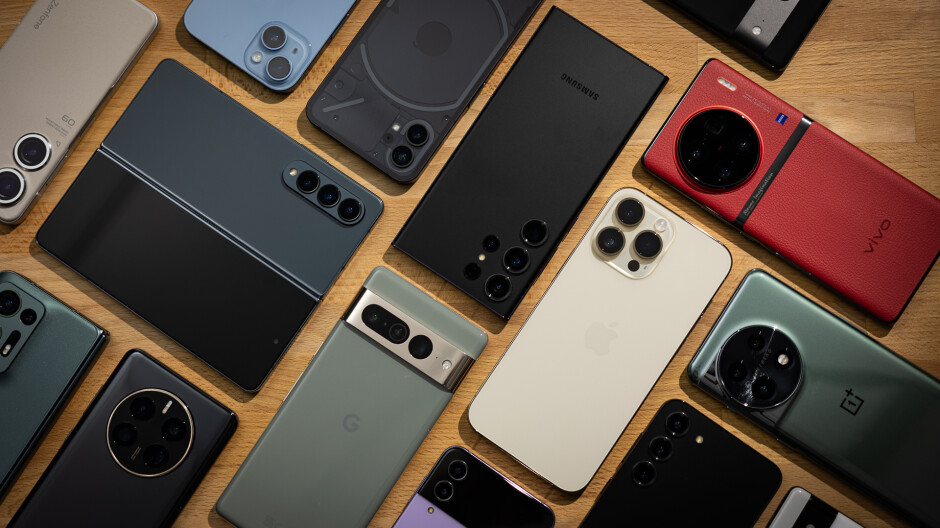

##### **Project Type**    - Classification
##### **Contribution**    - Individual
# **Name** - **Jaiswi**

# **Project Summary -**

**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**

1.Firstly Checked correlation between Each Features in dataset.

2.Checked if bluetooth and wifi available or not???

3.Checked can Battery Power be affected in mobile Price?? and how the battery mAh is spread

4.Checked can Ram, Screen Height  ,Screen width,pixel Height ,pixel width be affected in mobile Price??

5.Checked can 4G and 3G be affected in mobile Price??

6.Checked can FC (front camera megapixels) ,PC (Primary camera Megapixels) and Mobile Weight affected in mobile Price??

**Supervise Machine learning algorithms and implementation :**

1. Logistic regression

2. Random Forest Classifier

3. XG Boost Classifier




# **GitHub Link -**

https://github.com/jaiswi


# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

## **Data Overview**

*   Battery_power - Total energy a battery can store in one time measured in mAh
*   Blue - Has bluetooth or not
*   Clock_speed - speed at which microprocessor executes instructions
*   Dual_sim - Has dual sim support or not
*   Fc - Front Camera mega pixels
*   Four_g - Has 4G or not
*   Int_memory - Internal Memory in Gigabytes
*   M_dep - Mobile Depth in cm
*   Mobile_wt - Weight of mobile phone
*   N_cores - Number of cores of processor
*   Pc - Primary Camera mega pixels
*   Px_height - Pixel Resolution Height
*   Px_width - Pixel Resolution Width
*   Ram - Random Access Memory in Mega
*   Touch_screen - Has touch screen or not
*   Wifi - Has wifi or not
*   Sc_h - Screen Height of mobile in cm
*   Sc_w - Screen Width of mobile in cm
*   Talk_time - longest time that a single battery charge will last
*  Three_g - Has 3G or not

*   Wifi - Has wifi or not
*   
Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/data_mobile_price_range (1).csv'

df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()
print(f' We have {df.duplicated().sum()} duplicate values in dataset.')

In [ ]:
# remove zero values of pixel resolution height and screen width
df = df[df['sc_w'] != 0]
df = df[df['px_height'] != 0]
df.shape

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

So there are no null values.

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variables_df = df.columns.to_list()

In [ ]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
print(numerical_columns)

In [ ]:
print(categorical_columns)

In [ ]:
# Write your code to make your dataset analysis ready.

#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

There is no outliers.

In [ ]:
columns = categorical_columns
plt.figure(figsize=(20,15))
m=1
for i in columns:
  plt.subplot(4,4,m)
  m = m+1
  sns.boxplot(df[i],color="blue")

### What all manipulations have you done and insights you found?

We have created a separate columns for Numerical and Categorical Variables to work accordingly.It will help to understand the basic relationship between the features(defined as Categorical and Numerical) and the target variables.

**Nearest Neighbors Imputations (KNN Imputer)**

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [ ]:
# importing KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [ ]:
# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0].shape[0]

In [ ]:
# Checking shape
df.shape

We used k-Nearest Neighbors approach to impute missing values where a Euclidean distance is used to find the nearest neighbors.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Relation Between RAM,Battery_power,px_height and px_width**

In [ ]:
# Chart - 1 visualization code
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()


##### 1. Why did you pick the specific chart?

To check relation Between RAM,Battery_power,px_height and px_width.

##### 2. What is/are the insight(s) found from the chart?

* Mobiles having RAM more than 3000 MB falls under Very high cost category.As RAM increases price range also increases.
* Mobiles having RAM less than 1000 MB falls under low cost category.
* Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.
* Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 2

**Specification Check**

In [ ]:
# Checking the counts of binary categorical variables by grouping price range.
group_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()


In [ ]:
# Chart - 2 visualization code
# Chart - 2 visualization code
#plt.figure(figsize=(12,6))
group_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

##### 1. Why did you pick the specific chart?

To check the specifications of the mobiles.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 3

**Checking correlation between Each Features in dataset**

In [ ]:
# Chart - 3 visualization code
correlation = df.corr()
plt.figure(figsize = [16, 16])
sns.heatmap(correlation, cmap = 'rocket_r', annot = True)

##### 1. Why did you pick the specific chart?

To check the correlation between each features in the dataset.

#### Chart - 4

**Chceking the Price**

In [ ]:
# Chart - 4 visualization code
fig = plt.figure(1, figsize=(8,8))
data = [(len(df[df.price_range==0])),(len(df[df.price_range==1])),(len(df[df.price_range==2])),(len(df[df.price_range==3])) ]
keys = ['Low Cost', 'Medium cost', 'High Cost', 'Very High Cost']
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')[0:4]
plt.pie(data, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Mobile Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

To check the prices of mobiles.

##### 2. What is/are the insight(s) found from the chart?

* There are mobile phones in 4 price ranges. so according this pie chart percentages of all Mobile price range almost similar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will not help much.Because costs are almost similar.

#### Chart - 5

**Bluetooth connectivity**

In [ ]:
# Chart - 5 visualization code
# Chart - 5 visualization code
#checked if bluetooth available or not???

fig = plt.figure(1, figsize=(8,8))
blue_data = [(len(df[df.blue==0])),(len(df[df.blue==1]))]
blue_keys=["Bluetooth_Avilable","Bluetooth_Not_Avilable"]
explode = [0, 0.1]
palette_color =sns.color_palette('rocket_r')
plt.pie(blue_data, labels=blue_keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Avilable OR Not Avilable')
plt.show()



#Analysis can bluetooth are affected on mobile price or not
data1=df[df.blue==0]
BlueNotAviLowP=(data1['price_range']==0).sum()
BlueNotAviMedP=(data1['price_range']==1).sum()
BlueNotAviHighP=(data1['price_range']==2).sum()
BlueNotAviVHP=(data1['price_range']==2).sum()

BL_NA_P=[BlueNotAviLowP,BlueNotAviMedP,BlueNotAviHighP,BlueNotAviVHP]

data2=df[df.blue==1]
BlueAviLowP=(data2['price_range']==0).sum()
BlueAviMedP=(data2['price_range']==1).sum()
BlueAviHighP=(data2['price_range']==2).sum()
BlueAviVHP=(data2['price_range']==2).sum()

BL_A_P=[BlueAviLowP,BlueAviMedP,BlueAviHighP,BlueAviVHP]

fig = plt.figure(1, figsize=(8,8))
B_DATA= BL_NA_P
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')
plt.pie(B_DATA, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Not Avilable - Mobile Price Range ')
plt.show()

fig = plt.figure(1, figsize=(8,8))
B_DATA1= BL_A_P
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')
plt.pie(B_DATA1, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Avilable - Mobile Price  Range')
plt.show()

##### 1. Why did you pick the specific chart?

To check the bluetooth connectivity.

##### 2. What is/are the insight(s) found from the chart?

* So we can see half the devices have Bluetooth, and half don’t.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This Bluetooth features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

#### Chart - 6

**3G And 4G Connectivity**

In [ ]:
# Chart - 6 visualization code
binary_features = [ 'four_g', 'three_g']
for dataset in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16, 8))

  df[dataset].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette_color, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = dataset, hue = 'price_range', data = df, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(dataset)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

To check the connectivity of 3G and 4G on mobiles.

##### 2. What is/are the insight(s) found from the chart?

* Distribution of price range almost similar of supported and non supported feature in 4G . So that is not useful of prediction.
* Feature 'three_g' play an important feature in Price prediction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.it will help us to create a postitive business impact.

#### Chart - 7

**Mobile weight**

In [ ]:
# Chart - 7 visualization code
# Chart - 7 visualization code
sns.set_style("darkgrid")
df.boxplot(by ='price_range', column =['mobile_wt'], grid = False,color='red'),
plt.ylabel("mobile Weight (Gram)")

sns.displot(data=df, x="mobile_wt", hue="price_range", kind="kde")

##### 1. Why did you pick the specific chart?

To check the weights of mobiles according to cost price.

##### 2. What is/are the insight(s) found from the chart?

we can see that in this boxplot,the costly phones are lighter in weight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.it will help us to create a postitive business impact.

#### Chart - 8

**Correlation Heatmap**

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

##### 1. Why did you pick the specific chart?

To check the multicollinearity problem.

##### 2. What is/are the insight(s) found from the chart?

The most influential variable is RAM.

Most of the variables have very little correlation to price range.

Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.

Having 3G and 4G is somewhat correlated.

There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#already handeled

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#There is no outliers in this dataset.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

* 1 means it has the specifications.
* 0 means it do not have the specifications.
* Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.
* Very few mobiles(23.9%) do not have 3G.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# create copy of mobile_data
new_df=df.copy()

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# create new colom screen size and pixels
df['screen_size']= round(np.sqrt(df['sc_h']**2+df['sc_w']**2)/2.54,2)

df['Pixels']=df['px_height']*df['px_width']


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
 #dropping excess columns
df.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

In [ ]:
corr=df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:

# Transform Your data
# creating the set of dependent and independent variables
X = df.drop(labels='price_range', axis=1)
Y = df['price_range']

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {Y.shape} respectively.")

### 4. Data Scaling

In [ ]:

# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

I used Feature scaling method to normalize the range of independent variables or features of data.

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 42)

In [ ]:
# Getting the shape of Train Test set.

print("Training Dataset Shape:--")
print("X_train shape ", X_train.shape)
print("Y_train shape ", Y_train.shape)
print("Testing Dataset Shape:--")
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

##### What data splitting ratio have you used and why?

We have made the use of 80% and 20% Training and Testing data respectively.The data should be divided in such a way that neither of them is too high, which is more dependent on the ammount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

### 6. Handling Imbalanced Dataset

In [ ]:
price_range_values=df['price_range'].value_counts()
price_range_values

In [ ]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable

In [ ]:
# DImensionality Reduction (If needed)
#no need

### 7.Function For Confusion Matrix

In [ ]:
# function for confusion matrix
def matrix(actual, predicted):
  labels = ['0','1','2','3']
  cm = confusion_matrix(actual, predicted)
  print(cm)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## ***7. ML Model Implementation***

### ML Model - 1

**Building a Logistic Regression Model**

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model# function for logistic regression
def logistic_regression(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)

  # transforming the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # build a logistic regression model
  log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
  log_reg.fit(X_train, Y_train)

  # get the predicted probabilities
  logistic_train_prob = log_reg.predict_proba(X_train)
  logistic_test_prob = log_reg.predict_proba(X_test)

  # get the predicted classes
  logistic_train_class = log_reg.predict(X_train)
  logistic_test_class = log_reg.predict(X_test)

  # calculating accuracy on train and test set
  logistic_train_acc = accuracy_score(Y_train, logistic_train_class)
  logistic_test_acc = accuracy_score(Y_test, logistic_test_class)

  print("\n")
  print("The accuracy on train dataset is", logistic_train_acc)
  print("The accuracy on test dataset is", logistic_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  log_precision = precision_score(Y_test, logistic_test_class, average='weighted')
  print("The precision on test dataset is", log_precision)

  log_recall = recall_score(Y_test, logistic_test_class, average='weighted')
  print("The recall on test dataset is", log_recall)

  # calculating roc_auc_score on the test set
  log_roc = roc_auc_score(Y_test, logistic_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", log_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, logistic_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(Y_test, logistic_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, logistic_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': logistic_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return logistic_test_acc, log_precision, log_recall, log_roc

In [ ]:
#Running the Model
lr = logistic_regression(X,Y)

In [ ]:
# store the metrics of logistic regression
log_acc = lr[0]
log_precision = lr[1]
log_recall = lr[2]
log_roc = lr[3]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

**Building a Random Forest Classifier Model**

In [ ]:
# function for random forest
def random_forest(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
              'max_depth': [int(x) for x in np.linspace(5,10,5)],
              'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)]}

  # build a random forest model
  rf_model = RandomForestClassifier()

  # random search
  rf_grid = RandomizedSearchCV(estimator=rf_model,
                       param_distributions= param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  rf_grid.fit(X_train,Y_train)

  print(rf_grid.best_estimator_)
  rf_optimal_model = rf_grid.best_estimator_
  print(rf_grid.best_params_)

  # get the predicted probabilities
  rf_train_prob = rf_optimal_model.predict_proba(X_train)
  rf_test_prob = rf_optimal_model.predict_proba(X_test)

  # get the predicted classes
  rf_train_class = rf_optimal_model.predict(X_train)
  rf_test_class = rf_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  rf_train_acc = accuracy_score(Y_train, rf_train_class)
  rf_test_acc = accuracy_score(Y_test, rf_test_class)

  print("\n")
  print("The accuracy on train dataset is", rf_train_acc)
  print("The accuracy on test dataset is", rf_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  rf_precision = precision_score(Y_test, rf_test_class, average='weighted')
  print("The precision on test dataset is", rf_precision)

  rf_recall = recall_score(Y_test, rf_test_class, average='weighted')
  print("The recall on test dataset is", rf_recall)

  # calculating roc_auc_score on the test set
  rf_roc = roc_auc_score(Y_test, rf_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", rf_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, rf_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, rf_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, rf_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': rf_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = rf_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return rf_test_acc, rf_precision, rf_recall, rf_roc

In [ ]:
#Running the Model
rf = random_forest(X,Y)

In [ ]:
# select the most important features for modeling
X_new = df[['ram','battery_power']]
rf_new = random_forest(X_new,Y)

In [ ]:
# store the metrics of random forest
rf_acc = rf_new[0]
rf_precision = rf_new[1]
rf_recall = rf_new[2]
rf_roc = rf_new[3]

### ML Model - 3

**Building A XG Boost Model**

In [ ]:
# ML Model - 3 Implementation
# function for xgboost
def xg_boost(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
                'max_depth': [int(x) for x in np.linspace(5,10,5)],
                'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
                'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)],
                'learning_rate': [0.01,0.02,0.05,0.07,0.1]}

  # build a xgboost model
  xgb_model = XGBClassifier()

  # random search
  xgb_grid = RandomizedSearchCV(estimator=xgb_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  xgb_grid.fit(X_train,Y_train)

  print(xgb_grid.best_estimator_)
  xgb_optimal_model = xgb_grid.best_estimator_
  print(xgb_grid.best_params_)
  print("\n")

  # get the predicted probabilities
  xgb_train_prob = xgb_optimal_model.predict_proba(X_train)
  xgb_test_prob = xgb_optimal_model.predict_proba(X_test)

  # get the predicted classes
  xgb_train_class = xgb_optimal_model.predict(X_train)
  xgb_test_class = xgb_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  xgb_train_acc = accuracy_score(Y_train, xgb_train_class)
  xgb_test_acc = accuracy_score(Y_test, xgb_test_class)

  print("The accuracy on train set is", xgb_train_acc)
  print("The accuracy on test set is", xgb_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  xgb_precision = precision_score(Y_test, xgb_test_class, average='weighted')
  print("The precision on test dataset is", xgb_precision)

  xgb_recall = recall_score(Y_test, xgb_test_class, average='weighted')
  print("The recall on test dataset is", xgb_recall)

  # calculating roc_auc_score on the test set
  xgb_roc = roc_auc_score(Y_test, xgb_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", xgb_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, xgb_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, xgb_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, xgb_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': xgb_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = xgb_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return xgb_test_acc, xgb_precision, xgb_recall, xgb_roc

# Fit the Algorithm

# Predict on the model

In [ ]:
# run the model
xgb = xg_boost(X,Y)

In [ ]:
# select the most important features for modeling
X_new = df[['ram','battery_power']]
xgb_new = xg_boost(X_new,Y)

In [ ]:
# store the metrics of xgboost
xgb_acc = xgb_new[0]
xgb_precision = xgb_new[1]
xgb_recall = xgb_new[2]
xgb_roc = xgb_new[3]

# **Now Comparing all the Models**

In [ ]:
# a dataframe to compare all the models
models_df = pd.DataFrame(
    {'Models': ['Logistic Regression','Random Forest','XG Boost'],
     'Accuracy': [log_acc, rf_acc, xgb_acc],
     'Precision': [log_precision, rf_precision,  xgb_precision],
     'Recall': [log_recall, rf_recall,  xgb_recall],
     'ROC AUC': [log_roc, rf_roc,  xgb_roc,]}
)
models_df.sort_values(by=['Accuracy'], ascending=False, inplace=True)
models_df

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy score will be the best evalaution metric to select the model.

Logistic Regression performs the best among the three classification methods used.

Random forest and XG Boost perform almost same.

# **Conclusion**

* From EDA we can see that, there are mobile phones in 4 price ranges.
The number of elements is almost similar.

* Half the devices have Bluetooth, and half don’t.

* There is a gradual increase in battery as the price range increases.

* Ram has continuous increase with price range while moving from Low cost to Very high cost.

* Costly phones are lighter.

* RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

I have implemented 3 classification models and achieved a fairly good result for all the algorithms.

* Logistic Regression
* Random Forest
* XG Boost

* Logistic regression shows approx accuracy of 90% and the other two shows approx 80% accuracy, which shows that the data were properly classified.

* Logistic Regression performed better than the other two model.


#**THANK YOU!!**